<a href="https://colab.research.google.com/github/sathwikareddy1/DA-using-python/blob/main/DUAP__LAB_4_2183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marusagar/bank-customer-attrition-insights")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1


In [ ]:
ls/root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1

Bank-Customer-Attrition-Insights-Data.csv


In [ ]:

import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1/Bank-Customer-Attrition-Insights-Data.csv")



In [ ]:
df_original = df.copy()

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

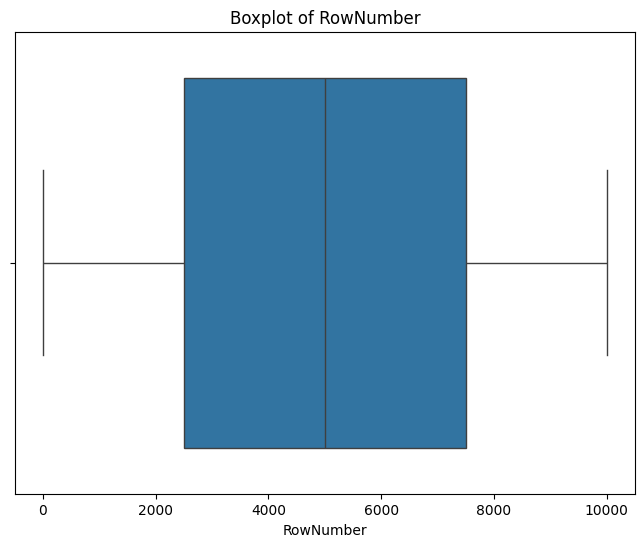

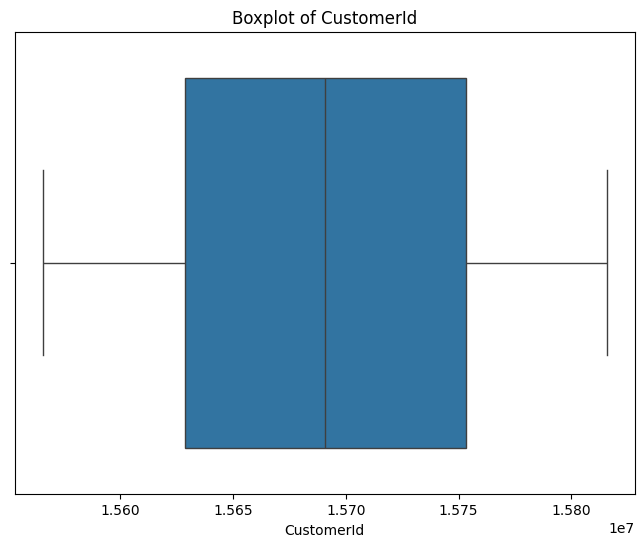

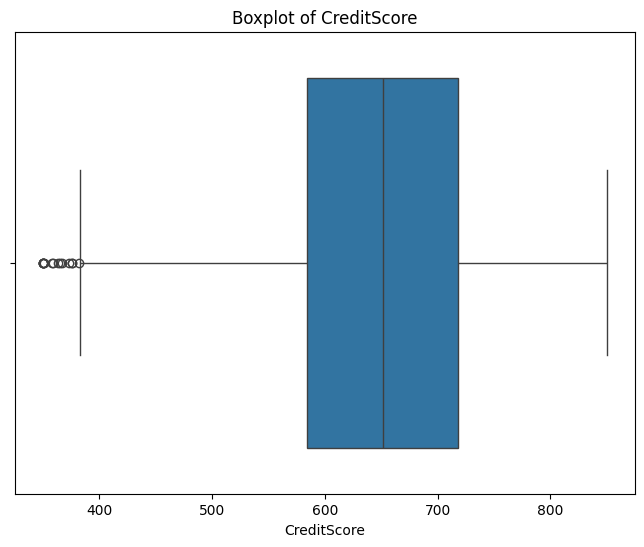

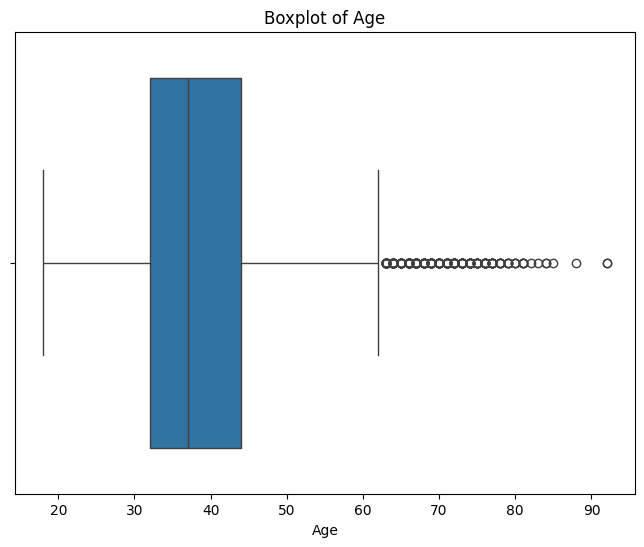

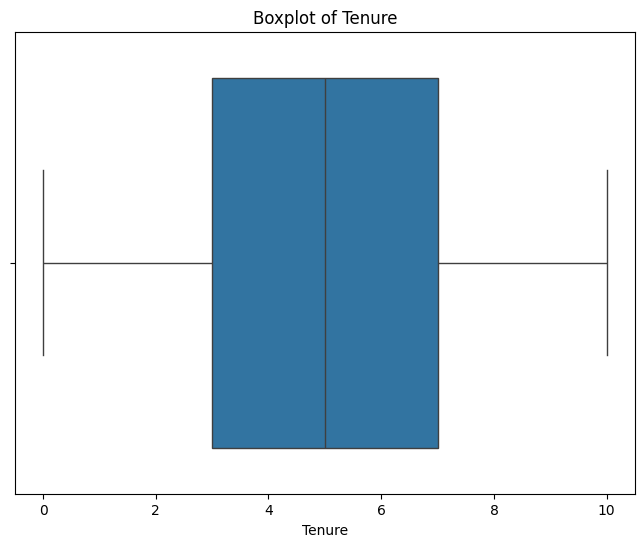

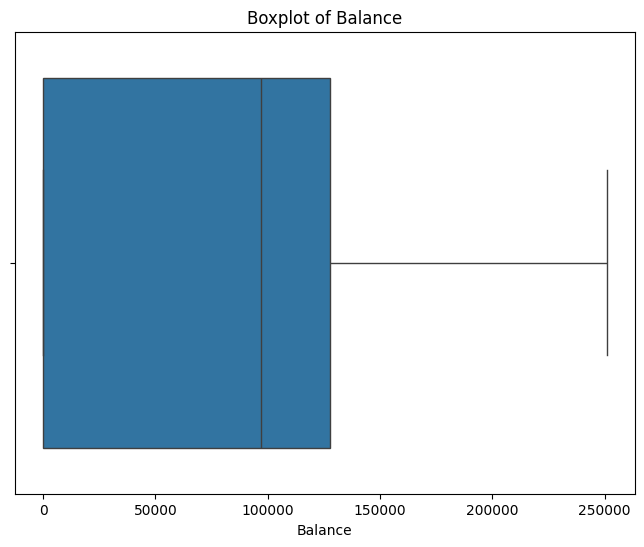

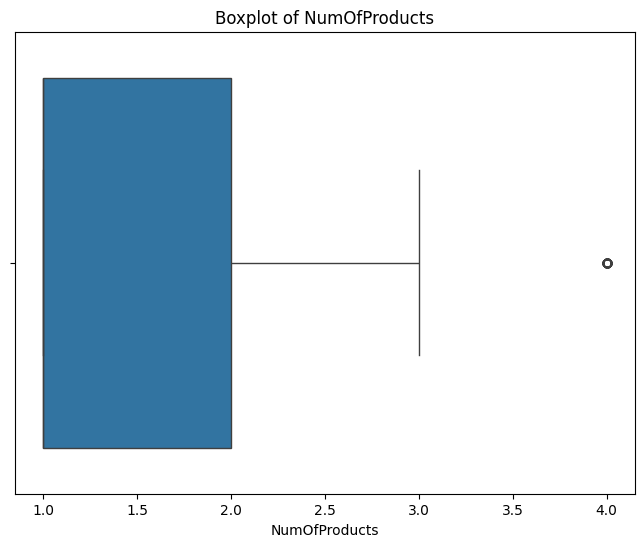

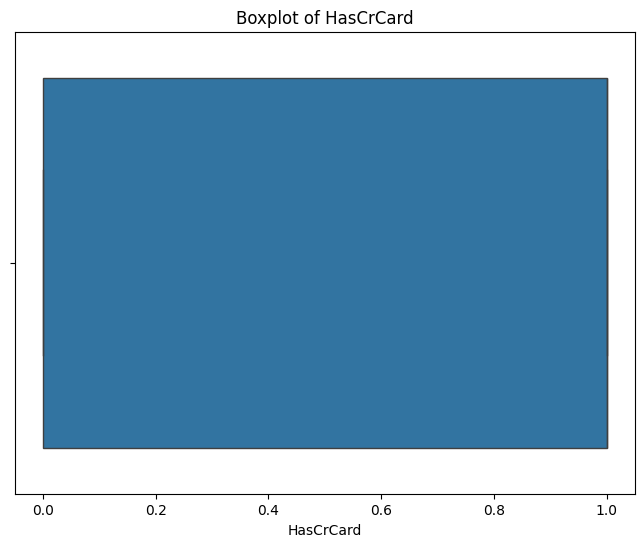

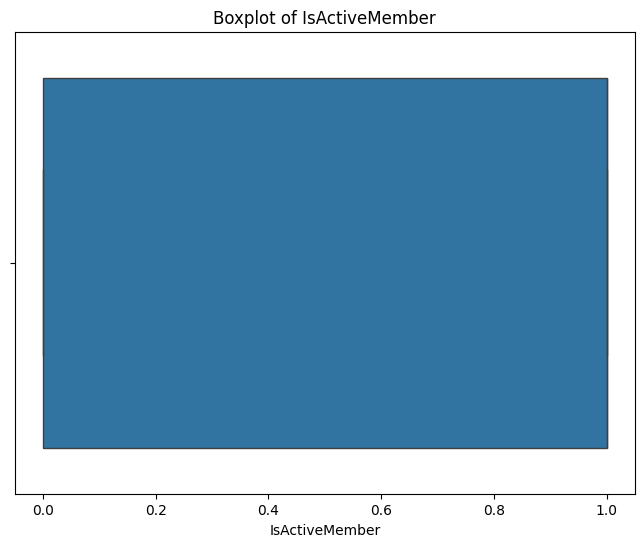

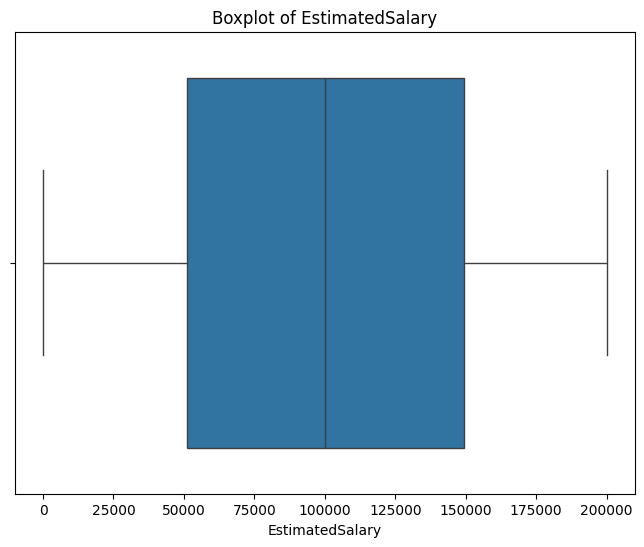

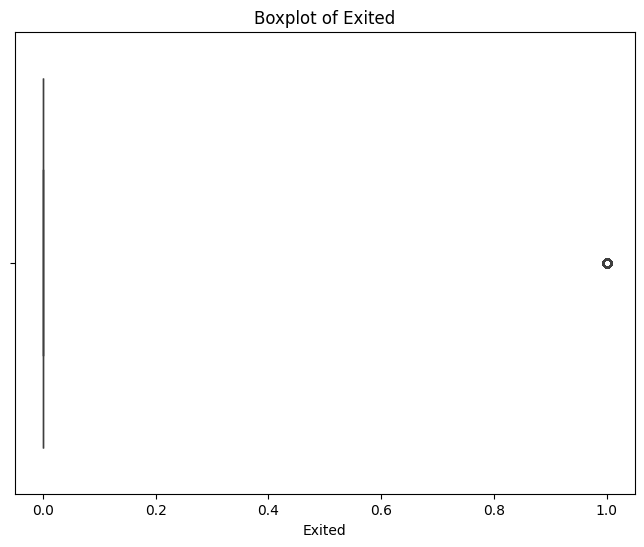

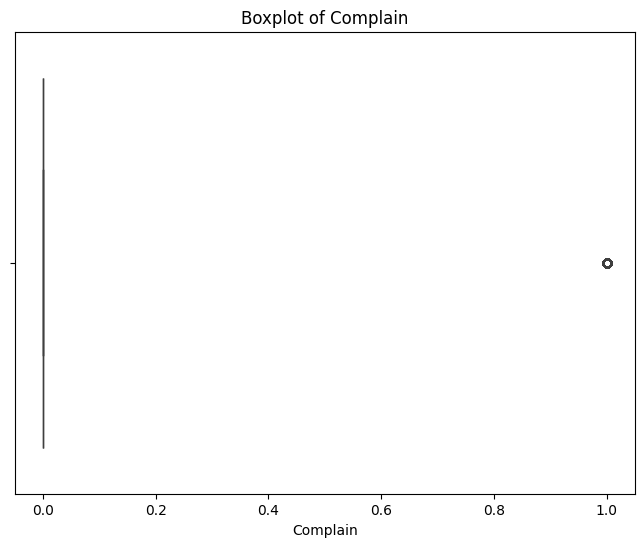

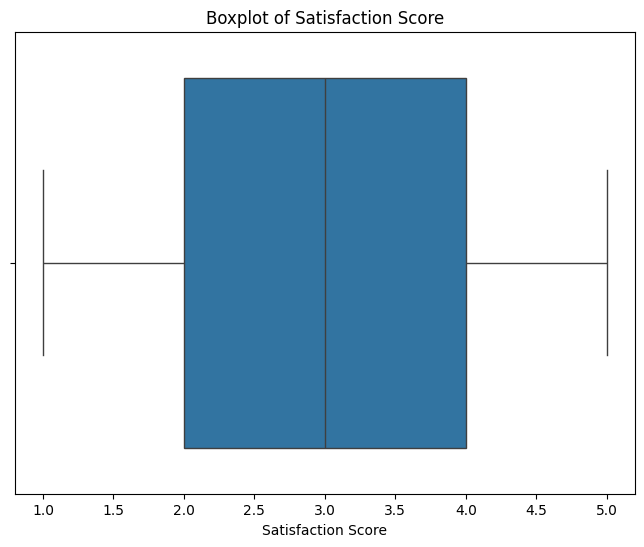

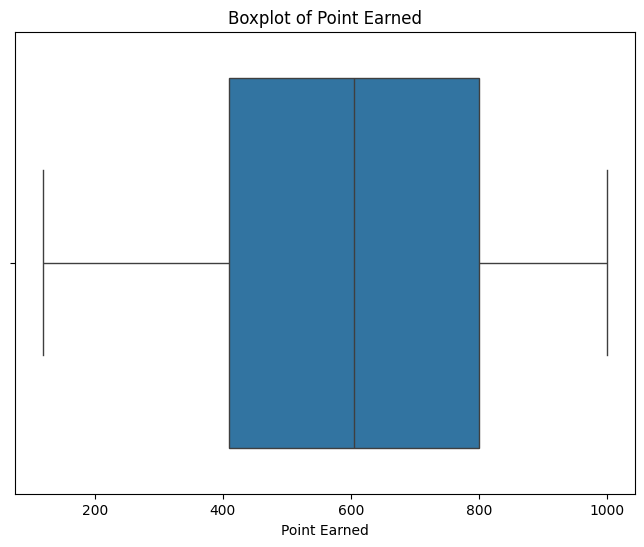

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Outlier Removal
def remove_outliers(df, columns):
    df_filtered = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]
    return df_filtered

# Identifying numerical columns for outlier removal
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Exited')  # Excluding target variable

df_cleaned = remove_outliers(df, numerical_columns)

# Splitting features and target variable
X = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Model Training (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Model Evaluation
print("SVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

SVM Model Evaluation:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534

    accuracy                           1.00      1534
   macro avg       1.00      1.00      1.00      1534
weighted avg       1.00      1.00      1.00      1534


Random Forest Model Evaluation:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1534

    accuracy                           1.00      1534
   macro avg       1.00      1.00      1.00      1534
weighted avg       1.00      1.00      1.00      1534



In [ ]:

# Data Preprocessing with original data (no outlier removal)
X_original = df_original.drop('Exited', axis=1)
y_original = df_original['Exited']

# Handle categorical variables
X_original = pd.get_dummies(X_original, drop_first=True) # Use drop_first=True to avoid multicollinearity

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

scaler_original = StandardScaler()
X_train_scaled_original = scaler_original.fit_transform(X_train_original)
X_test_scaled_original = scaler_original.transform(X_test_original)


# Model Training (SVM) with original data
svm_model_original = SVC(kernel='linear', random_state=42)
svm_model_original.fit(X_train_scaled_original, y_train_original)
svm_predictions_original = svm_model_original.predict(X_test_scaled_original)


# Model Training (Random Forest) with original data
rf_model_original = RandomForestClassifier(random_state=42)
rf_model_original.fit(X_train_scaled_original, y_train_original)
rf_predictions_original = rf_model_original.predict(X_test_scaled_original)

# Model Evaluation
print("\nSVM Model Evaluation (with outliers):")
print("Accuracy:", accuracy_score(y_test_original, svm_predictions_original))
print(classification_report(y_test_original, svm_predictions_original))

print("\nRandom Forest Model Evaluation (with outliers):")
print("Accuracy:", accuracy_score(y_test_original, rf_predictions_original))
print(classification_report(y_test_original, rf_predictions_original))



SVM Model Evaluation (with outliers):
Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Random Forest Model Evaluation (with outliers):
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

